# Case Study No. 2: Full Analysis and Visualization [Walkthrough]

We will re-analyze case study no. 1 considering all other factors such as types of invoices, negatives, and factoring the outliers.

You may download the dataset hereLinks to an external site. (filename: online_retail_II.xlsx) (43.5 Mb)

Use this linkLinks to an external site. for the python notebook library requirements

Information about the dataset:
A real online retail transaction data set of two years. This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

Dataset Characteristics:

Multivariate, Sequential, Time-Series, Text

- InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invoice date and time. Numeric. The day and time when a transaction was generated.
- UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
- CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal. The name of the country where a customer resides.


In [1]:
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn
# %pip install openpyxl

In [2]:
import pandas as pd 
import matplotlib as plt 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [3]:
pd.set_option('display.max_columns', 999)

In [4]:
# Data Exploration

df = pd.read_excel("Datasets/online_retail_II.xlsx")
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [6]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [7]:
df.describe(include='object')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [8]:
df[df['Customer ID'].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [9]:
df[df['Quantity'] < 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.0,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom


In [10]:
df['Invoice'] = df['Invoice'].astype('str')
df[df['Invoice'].str.match("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


In [11]:
df['Invoice'].str.replace('[0-9]', "", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [12]:
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [13]:
df["StockCode"] = df['StockCode'].astype('str') 
# df[df["StockCode"].str.match("^\\d{5}$") == False]
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^df{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['79323P', '79323W', '48173C', ..., '85049g', '72803b', '79151B'],
      dtype=object)

In [14]:
df[df["StockCode"].str.contains("^POST")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.0,Germany
927,C489538,POST,POSTAGE,-1,2009-12-01 12:18:00,9.58,15796.0,United Kingdom
...,...,...,...,...,...,...,...,...
522916,537967,POST,POSTAGE,1,2010-12-09 11:31:00,18.00,12494.0,France
522930,537995,POST,POSTAGE,2,2010-12-09 11:39:00,18.00,12712.0,Germany
522974,538003,POST,POSTAGE,8,2010-12-09 12:05:00,18.00,12429.0,Denmark
523064,538008,POST,POSTAGE,5,2010-12-09 12:17:00,18.00,12683.0,France


In [15]:
df[df["StockCode"].str.contains("^BANK CHARGES")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
18410,C490943,BANK CHARGES,Bank Charges,-1,2009-12-08 14:08:00,15.00,16703.0,United Kingdom
18466,490948,BANK CHARGES,Bank Charges,1,2009-12-08 14:29:00,15.00,16805.0,United Kingdom
33435,C492206,BANK CHARGES,Bank Charges,-1,2009-12-15 16:32:00,848.43,NaN,United Kingdom
55948,C494438,BANK CHARGES,Bank Charges,-1,2010-01-14 12:15:00,767.99,NaN,United Kingdom
94431,498269,BANK CHARGES,Bank Charges,1,2010-02-17 15:03:00,15.00,16928.0,United Kingdom
...,...,...,...,...,...,...,...,...
450634,C532203,BANK CHARGES,Bank Charges,-1,2010-11-11 12:31:00,15.00,NaN,United Kingdom
455268,532637,BANK CHARGES,Bank Charges,1,2010-11-12 16:18:00,15.00,13174.0,United Kingdom
493162,535474,BANK CHARGES,Bank Charges,1,2010-11-26 13:56:00,15.00,16928.0,United Kingdom
507344,536779,BANK CHARGES,Bank Charges,1,2010-12-02 15:08:00,15.00,15823.0,United Kingdom


### DATA CLEANING

In [16]:
cleaned_df = df.copy()

In [17]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype('str')

mask = cleaned_df["Invoice"].str.match("^\\d{6}$") == True
cleaned_df = cleaned_df[mask]

In [18]:
cleaned_df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [19]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515252 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      515252 non-null  object        
 1   StockCode    515252 non-null  object        
 2   Description  512324 non-null  object        
 3   Quantity     515252 non-null  int64         
 4   InvoiceDate  515252 non-null  datetime64[ns]
 5   Price        515252 non-null  float64       
 6   Customer ID  407695 non-null  float64       
 7   Country      515252 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 35.4+ MB


In [20]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype('str')

mask = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$") == True) |
    (cleaned_df["StockCode"].str.match("^df{5}[a-zA-Z]+$") == True) |
    (cleaned_df["StockCode"].str.contains("^PADS") == True)
)
cleaned_df = cleaned_df[mask]

In [21]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 437344 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      437344 non-null  object        
 1   StockCode    437344 non-null  object        
 2   Description  435522 non-null  object        
 3   Quantity     437344 non-null  int64         
 4   InvoiceDate  437344 non-null  datetime64[ns]
 5   Price        437344 non-null  float64       
 6   Customer ID  350943 non-null  float64       
 7   Country      437344 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 30.0+ MB


In [22]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,437344.000000,437344,437344.000000,350943.000000
mean,11.213084,2010-07-03 09:58:02.483994112,3.366221,15360.244439
min,-9600.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,1.000000,2010-03-28 11:02:00,1.250000,13985.000000
50%,4.000000,2010-07-15 11:08:00,2.100000,15311.000000
75%,12.000000,2010-10-18 14:07:00,4.210000,16797.000000
max,19152.000000,2010-12-09 20:01:00,1157.150000,18287.000000
std,109.000782,NaN,5.226559,1678.202935


In [23]:
cleaned_df[cleaned_df["Price"] == 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.0,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.0,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524724,538138,72814,NaN,2,2010-12-09 15:57:00,0.0,NaN,United Kingdom
524730,538141,22218,NaN,2,2010-12-09 15:58:00,0.0,NaN,United Kingdom
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.0,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.0,NaN,United Kingdom


In [24]:
cleaned_df = cleaned_df[cleaned_df["Price"] > 0]

In [25]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,434896.000000,434896,434896.000000,350916.000000
mean,11.631427,2010-07-03 12:36:21.289504,3.385169,15360.352694
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000
25%,1.000000,2010-03-28 11:38:00,1.250000,13985.000000
50%,4.000000,2010-07-15 12:06:00,2.100000,15311.000000
75%,12.000000,2010-10-18 14:57:00,4.210000,16797.000000
max,19152.000000,2010-12-09 20:01:00,1157.150000,18287.000000
std,90.220900,NaN,5.235125,1678.162970


In [26]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 434896 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      434896 non-null  object        
 1   StockCode    434896 non-null  object        
 2   Description  434896 non-null  object        
 3   Quantity     434896 non-null  int64         
 4   InvoiceDate  434896 non-null  datetime64[ns]
 5   Price        434896 non-null  float64       
 6   Customer ID  350916 non-null  float64       
 7   Country      434896 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 29.9+ MB


In [27]:
len(cleaned_df[cleaned_df["Price"] == 0])

0

In [28]:
len(cleaned_df[cleaned_df["Price"] > 0])

434896

In [29]:
len(cleaned_df[cleaned_df["Price"] < 0])

0

In [30]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,434896.000000,434896,434896.000000,350916.000000
mean,11.631427,2010-07-03 12:36:21.289504,3.385169,15360.352694
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000
25%,1.000000,2010-03-28 11:38:00,1.250000,13985.000000
50%,4.000000,2010-07-15 12:06:00,2.100000,15311.000000
75%,12.000000,2010-10-18 14:57:00,4.210000,16797.000000
max,19152.000000,2010-12-09 20:01:00,1157.150000,18287.000000
std,90.220900,NaN,5.235125,1678.162970


In [31]:
cleaned_df.dropna(subset=["Customer ID"], inplace=True)

In [32]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,350916.000000,350916,350916.000000,350916.000000
mean,13.700059,2010-07-05 17:14:15.798311168,2.979794,15360.352694
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000
25%,2.000000,2010-03-31 17:29:00,1.250000,13985.000000
50%,5.000000,2010-07-18 13:42:00,1.950000,15311.000000
75%,12.000000,2010-10-17 14:26:00,3.750000,16797.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,100.078594,NaN,4.424766,1678.162970


In [33]:
len(cleaned_df)/len(df) 

0.667825014606222

### Feature Engineering 

In [34]:
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]

In [35]:
cleaned_df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,39.6
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,59.5
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.6
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom,45.0
10,489435,22195,HEART MEASURING SPOONS LARGE,24,2009-12-01 07:46:00,1.65,13085.0,United Kingdom,39.6
11,489435,22353,LUNCHBOX WITH CUTLERY FAIRY CAKES,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.6


In [36]:
aggregated_df = cleaned_df.groupby("Customer ID", as_index=False).agg(
    MonetaryValue=("SalesLineTotal", "sum"),
    Frequency=("Invoice", "nunique"),
    LastInvoiceDate=("InvoiceDate", "max")
)

In [37]:
aggregated_df.head(10)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.0,144.02,2,2010-06-28 13:53:00
1,12347.0,966.87,2,2010-12-07 14:57:00
2,12348.0,221.16,1,2010-09-27 14:59:00
3,12349.0,1946.64,2,2010-10-28 08:23:00
4,12351.0,300.93,1,2010-11-29 15:23:00
5,12352.0,332.40,2,2010-11-29 10:07:00
6,12353.0,317.76,1,2010-10-27 12:44:00
7,12355.0,329.41,1,2010-05-21 11:59:00
8,12356.0,2092.58,3,2010-11-24 12:24:00
9,12357.0,10468.27,1,2010-11-16 10:05:00


In [38]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

aggregated_df.head(10)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.0,144.02,2,2010-06-28 13:53:00,164
1,12347.0,966.87,2,2010-12-07 14:57:00,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73
3,12349.0,1946.64,2,2010-10-28 08:23:00,42
4,12351.0,300.93,1,2010-11-29 15:23:00,10
5,12352.0,332.40,2,2010-11-29 10:07:00,10
6,12353.0,317.76,1,2010-10-27 12:44:00,43
7,12355.0,329.41,1,2010-05-21 11:59:00,202
8,12356.0,2092.58,3,2010-11-24 12:24:00,15
9,12357.0,10468.27,1,2010-11-16 10:05:00,23


In [39]:
import matplotlib.pyplot as plt


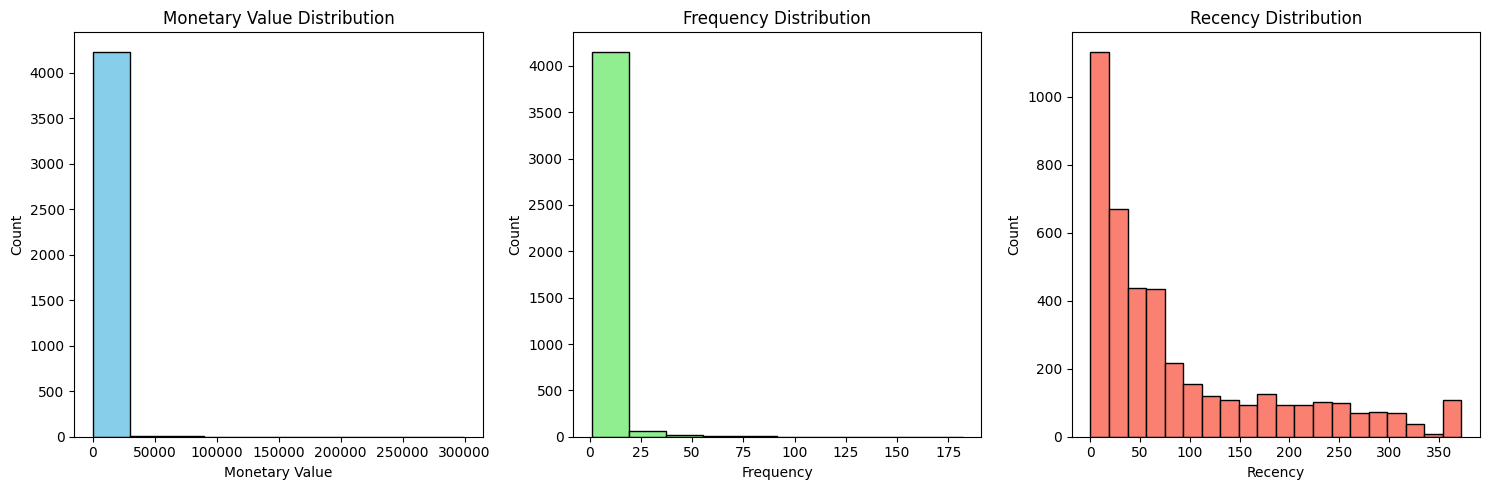

In [40]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

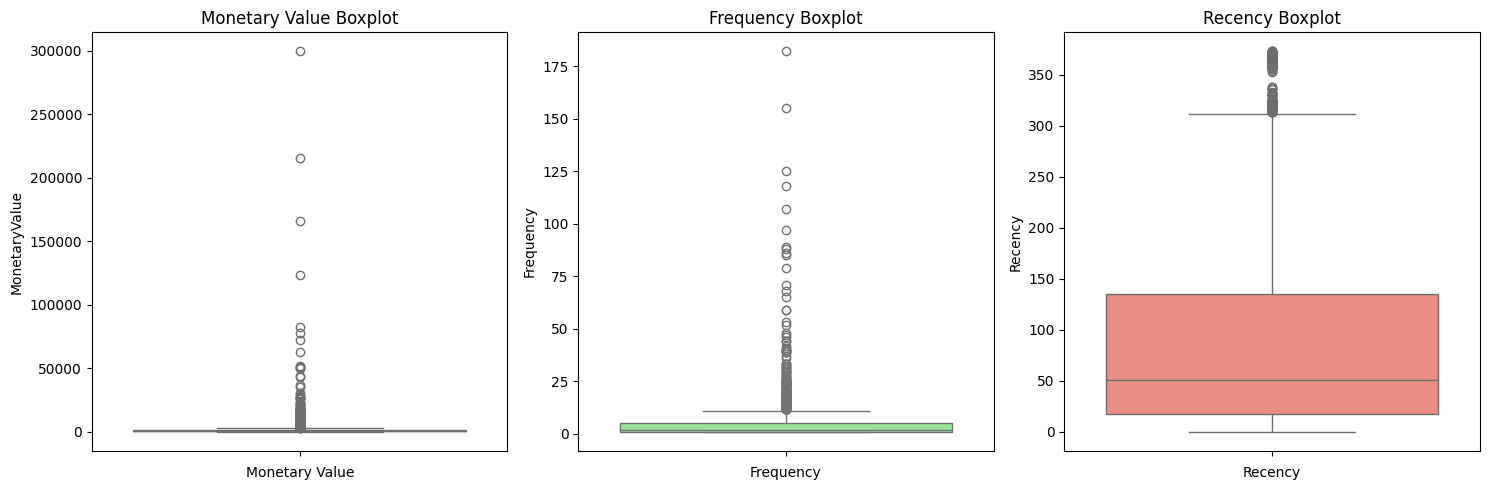

In [41]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=aggregated_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=aggregated_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=aggregated_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

In [42]:
M_Q1 = aggregated_df['MonetaryValue'].quantile(0.25)
M_Q3 = aggregated_df['MonetaryValue'].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outliers = aggregated_df[
    (aggregated_df['MonetaryValue'] > (M_Q3 + 1.5 * M_IQR)) | 
    (aggregated_df["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR))
]

In [43]:
monetary_outliers.head(10)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
9,12357.0,10468.27,1,2010-11-16 10:05:00,23
25,12380.0,4131.84,4,2010-08-31 14:54:00,100
41,12409.0,11171.42,4,2010-10-15 10:24:00,55
47,12415.0,17985.44,4,2010-11-29 15:07:00,10
59,12429.0,3515.55,5,2010-12-09 12:05:00,0
60,12431.0,3578.80,11,2010-12-01 10:03:00,8
61,12433.0,6873.74,4,2010-12-08 16:49:00,1
63,12435.0,5786.74,4,2010-11-08 10:07:00,31
64,12437.0,6429.67,20,2010-11-09 14:46:00,30
73,12454.0,12931.44,3,2010-11-09 10:09:00,30


In [44]:

F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers = aggregated_df[(aggregated_df['Frequency'] > (F_Q3 + 1.5 * F_IQR)) | (aggregated_df['Frequency'] < (F_Q1 - 1.5 * F_IQR))].copy()

frequency_outliers.head(10)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
64,12437.0,6429.67,20,2010-11-09 14:46:00,30
83,12471.0,17710.95,44,2010-11-30 14:35:00,9
84,12472.0,9615.37,13,2010-12-05 14:19:00,4
91,12482.0,21941.72,27,2010-05-12 16:51:00,211
113,12523.0,2184.25,12,2010-11-30 12:31:00,9
124,12540.0,6885.18,15,2010-11-26 10:43:00,13
143,12583.0,6278.06,13,2010-12-01 08:45:00,8
162,12621.0,9890.64,16,2010-12-09 10:16:00,0
177,12647.0,7973.85,25,2010-12-07 12:28:00,2
199,12681.0,14609.61,23,2010-12-07 10:08:00,2


In [45]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers.index)) & (~aggregated_df.index.isin(frequency_outliers.index))]

non_outliers_df.head(10)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.0,144.02,2,2010-06-28 13:53:00,164
1,12347.0,966.87,2,2010-12-07 14:57:00,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73
3,12349.0,1946.64,2,2010-10-28 08:23:00,42
4,12351.0,300.93,1,2010-11-29 15:23:00,10
5,12352.0,332.40,2,2010-11-29 10:07:00,10
6,12353.0,317.76,1,2010-10-27 12:44:00,43
7,12355.0,329.41,1,2010-05-21 11:59:00,202
8,12356.0,2092.58,3,2010-11-24 12:24:00,15
10,12358.0,1181.61,3,2010-11-29 10:56:00,10
